# Plots for LDSC analysis

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [7]:
data_path = '/data_volume/memento/lupus/ldsc/'

In [8]:
traits = "     PASS_Crohns_Disease PASS_Rheumatoid_Arthritis PASS_Ulcerative_Colitis UKB_460K.disease_ALLERGY_ECZEMA_DIAGNOSED bentham.lupus".split()

In [9]:
trait_names = {
    'PASS_Crohns_Disease': 'CD',
    'PASS_Rheumatoid_Arthritis':'RA',
    'PASS_Ulcerative_Colitis':'UC',
    'UKB_460K.disease_ALLERGY_ECZEMA_DIAGNOSED':'Eczema',
    'bentham.lupus':'Lupus'
}

### Read results

In [10]:
results = []
for method in ['mateqtl', 'memento']:
    for pop in ['eur', 'asian']:
        for t in traits:
            df = pd.read_table(data_path + 'results/{}_{}_{}.cell_type_results.txt'.format(method, pop, t))
            df['pop'] = pop
            df['method'] = method
            df['trait'] = t
            results.append(df)
results = pd.concat(results)
results['log10p'] = -np.log10(results['Coefficient_P_value'])
results['trait_name'] = results['trait'].apply(lambda x: trait_names[x])

In [11]:
combined_results = results.groupby(['Name', 'method', 'trait_name'])['Coefficient_P_value'].apply(lambda x: stats.combine_pvalues(x)[1]).reset_index()

In [12]:
combined_results['log10p'] = -np.log10(combined_results['Coefficient_P_value'])

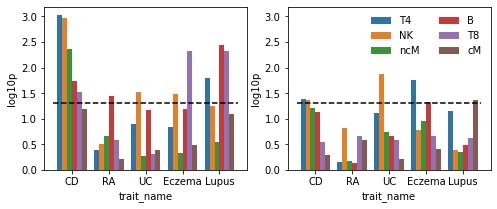

In [14]:
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
sns.barplot(x='trait_name', y='log10p', hue='Name', data=results.query('pop=="{}" & method == "memento"'.format('asian')))
plt.plot([-0.5, 4.5], [-np.log10(0.05), -np.log10(0.05)], '--', color='k')
ylims = plt.ylim()
plt.legend([], frameon=False)

plt.subplot(1, 2, 2)

sns.barplot(x='trait_name', y='log10p', hue='Name', data=results.query('pop=="{}" & method == "mateqtl"'.format('asian')))
plt.ylim(ylims)
plt.plot([-0.5, 4.5], [-np.log10(0.05), -np.log10(0.05)], '--', color='k')
plt.legend(loc='upper right', ncol=2, frameon=False)


### Compare gene lists from Gracie's hits

In [30]:
ct = 'cM'
m = pd.read_table(data_path + 'bedfiles/mateqtl/asian_{}.bed'.format(ct), header=None)
g = pd.read_table('gracie_reference/van_fdr0.05/{}_expr.bed'.format(ct.lower()), header=None)

In [31]:
m.shape


(846, 4)

In [32]:
g.shape

(1441, 4)

In [33]:
m

,0,1,2,3
0,chr1,834342,1034812,HES4
1,chr1,3589352,3789405,SMIM1
2,chr1,7731329,7931445,VAMP3
3,chr1,7803143,8004010,UTS2
4,chr1,8312464,8515180,RERE
...,...,...,...,...
841,chr21,46205868,46406345,ITGB2
842,chr21,46240950,46441242,ITGB2-AS1
843,chr21,46259955,46460101,FAM207A
844,chr21,47606267,47806329,YBEY


In [34]:
m_genes = set(m[3].tolist())

In [35]:
g_genes = set(g[3].tolist())

In [36]:
len(m_genes & g_genes)

524

In [29]:
m.merge(g, on=3)

,0_x,1_x,2_x,3,0_y,1_y,2_y
0,chr1,834342,1034812,HES4,chr1,834342,1034812
1,chr1,3589352,3789405,SMIM1,chr1,3589352,3789405
2,chr1,5986073,6186505,KCNAB2,chr1,5986073,6186505
3,chr1,7803143,8004010,UTS2,chr1,7803143,8004010
4,chr1,7921714,8121795,PARK7,chr1,7921714,8121795
...,...,...,...,...,...,...,...
850,chr21,46205868,46406345,ITGB2,chr21,46205868,46406345
851,chr21,46240950,46441242,ITGB2-AS1,chr21,46240950,46441242
852,chr21,46240950,46441242,ITGB2-AS1,chr21,46240950,46441242
853,chr21,46259955,46460101,FAM207A,chr21,46259955,46460101
